# Background knowledge

### Eigen Vector, Eigen Value (고유 분해)

- Assuming we can find the $v$, $\lambda$ satisfying follow equiations

$$ Av = \lambda v $$

$$ Av - \lambda v = (A-\lambda I)v = 0 $$

- $\lambda$ is called `eigen value` and $v$ is called `eigen vector`.
- Eigenvector's size changes but direction does not change.
- $c*v$ is also eigenvector. So, eigenvector is normalized in usual. $ \frac{v}{||v||} $
- Now we have to find eigen value and vector. matrix A's eigenvalue is can be found by follow process.
    - We know $ (A-\lambda I)v = 0 $
    - It means, $ (A-\lambda I) $ has no inverse matrix. If $ (A-\lambda I) $ has inverse matrix, v is always 0.
    - Using this mean (`there is no inverse matrix A`)
        - in $ (A-\lambda I) $ = ([[a, b], [c, d]]), we knows `ad-bc=0`. and we can solve this to find $\lambda$.
- Then, we can also find eigenvector using this equation. $ (A-\lambda I)v = 0 $

In [5]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

A = np.array([[1,-2], [2,-3]])
eigenvalue, eigenvector = np.linalg.eig(A)

print(eigenvalue)
print(eigenvector)

[-0.99999998 -1.00000002]
[[0.70710678 0.70710678]
 [0.70710678 0.70710678]]


#### diagonalization

- Now we knows $ \lambda_1, \lambda_2, \lambda_3, ... \lambda_N$ and $ v_1, v_2, v_3, ... v_N $
- And we can define belows
    - $ V = [v_1, v_2, v_3, ... v_N] $
    - <img src="img/diagonal.png" alt="diagonal" style="width: 200px;"/>
    - If V has inverse matrix, then $A = V\bigwedge V^{-1}$. And it is the matrix's diagonalization.
    - And $AA^T = V\bigwedge V^{T}$.

----
### Singular Value Decomposition (특잇값 분해)

Express as 3 matrixes product from N x M size matrix A is singular value decomposition. PCA can be applied diagonal matrix, but SVD can be applied MxN matrix.

- $ A = U\Sigma V^T $
    - Diagonal matrix with positive diagonal component : $\Sigma \in R^{NxM}$
    - N'th Square matrix. All of column vectors are unit vector and orthogonal for each other : $U \in R^{NxN}$
        - It calls orthogonal matrix.
        - $ U^TU = UU^T = I $
        - $ U^{-1} = U^T $
    - M'th Square matrix. All of column vectors are unit vector and orthogonal for each other : $V \in R^{MxM}$

<img src="img/svd.png" alt="MF" style="width: 500px;"/>

- In recommender system, each U's row means `User Latent Factor` and each $V^T$'s column means `Item Latent Factor`

#### How to find $ U, \Sigma, V $?

- 1. find eigenvalue, eigenvector of $A^TA$.
- 2. find $U, V$
- more detail - https://www.d.umn.edu/~mhampton/m4326svd_example.pdf

----
## Optimization

### 1) Gradient Descent

- Summarize in regression part : [Link](https://github.com/yoonkt200/recommender-system/tree/master/02-regression)

----
### 2) Others

#### Newton Method
- Newton method using when approximating the solution of an equation.
- If the cost function $f(x)$ is n'th function(n>2), for example, $f(x) = x^7 + 5x^6 + ... + x = 0$, we can't find the solution of equation.
- Below image can explain the process of newton method.

<img src="img/newton.png" alt="MF" style="width: 300px;"/>

- Equation of newton method is : $ x^{t+1} = x^t - \frac{f(x^)}{f`(x^)} $


#### Greedy Search **(Pass)**

----
### 3) Lagrange Multiplier

In optimization problem, some cases have constrained condition.

- The below situation is the case. $f(x)$ is objective function to minimize, and g(x) is a constrain condition.

$$ \underset{x}{argmin}f(x) $$

$$ x \in R^N $$

$$ g_j(x) (j=1, ..., M) $$

- for example, in this situation(`minimize f(x) and satisfy g(x)`), we have to find point $ (x_1, x_2) $
    - $ f(x_1, x_2) = x_1^2 + x_2^2 $
    - $ g(x_1, x_2) = x_1+x_2-1=0 $

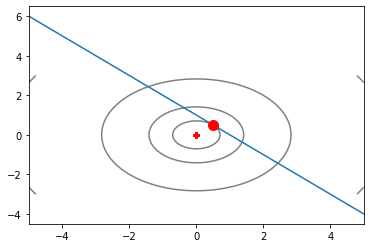

In [3]:
# f(x)
def f1(x1, x2):
    return x1 ** 2 + x2 ** 2

x1 = np.linspace(-5, 5, 100)
x2 = np.linspace(-3, 3, 100)
X1, X2 = np.meshgrid(x1, x2)
Y = f1(X1, X2)

# g(x)
x2_g = 1-x1

plt.contour(X1, X2, Y, colors='gray', levels=[0.5,2,8,32])
plt.plot(x1, x2_g)

plt.plot([0], [0], 'rP')
plt.plot([0.5], [0.5], 'ro', ms=10)

- Lagrange multiplier make new objective function $ h(x) $.
    - $ h(x, \lambda) = h(x_1, x_2, ..., x_N, \lambda_1, ... \lambda_M) $
    - $ = f(x) + \sum_{j=1}^{M}\lambda_j g_j(x)$
- And we have to find belows.
    - $ \frac{dh}{dx_1} = \frac{df}{dx_1} + \sum_{j=1}^{M}\lambda_j\frac{dg_j}{dx_1} = 0 $
    - $ \frac{dh}{dx_2} = \frac{df}{dx_2} + \sum_{j=1}^{M}\lambda_j\frac{dg_j}{dx_2} = 0 $
    - $ ... $
    - $ \frac{dh}{d\lambda_1} = g_1 = 0 $
    - $ \frac{dh}{d\lambda_2} = g_1 = 0 $
    - $ ... $
    
- Then we can find $ x_1, x_2.... $

----
- Other example : Find the maximum and minimum values of 4𝑥 − 3𝑦 subject to the constraint 2𝑥2 + 𝑦2 = 68.

<img src="img/lagrange.png" alt="MF" style="width: 300px;"/>

----
#### Appendix : KKT(Karush-Kuhn-Tucker)

- If the $g(x)$ is inequality condition like this, we consider KKT(Karush-Kuhn-Tucker).
    - $ g_j(x) \le 0 $
- KKT has 3 rule
    - $ \frac{dh(x,\lambda)}{dx_i} = 0 $ for all $i$
    - $ \lambda_j * \frac{dh(x,\lambda)}{d\lambda_i} = 0 $
    - $\lambda_j \ge 0$

----
#### references
- https://datascienceschool.net/view-notebook/04358acdcf3347fc989c4cfc0ef6121c/
- https://ratsgo.github.io/from%20frequency%20to%20semantics/2017/04/06/pcasvdlsa/
- https://angeloyeo.github.io/2019/08/01/SVD.html